In [2]:
import warnings
warnings.filterwarnings("ignore")

In [119]:
import os
import time
import sklearn
import numpy as np
import pandas as pd
import math
from tqdm import tqdm
from random import random
from tabulate import tabulate
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import ExtraTreeClassifier
from contextlib import redirect_stdout
evaluate={'Acc':"Accuracy", 'b_Acc':"Balanced Accuracy", 'F1':"F1 Score", 'kap':"Kappa", 'ROC':"Roc"}

In [4]:
saat=time.time()

In [5]:
def folder(f_name): #this function creates a folder named "attacks" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")

In [6]:
def find_the_way(path,file_format,con=""):
    files_add = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if file_format in file:
                if con in file:
                    files_add.append(os.path.join(r, file))  
            
    return files_add

files_add=find_the_way("./",".csv")
files_add

['./session-1-DeviceGroup-1.csv',
 './session-1-DeviceGroup-2.csv',
 './session-2-DeviceGroup-1.csv',
 './session-2-DeviceGroup-2.csv',
 './results\\compare\\CV\\DT_CS1D1_arp.duplicate-address-detected.csv',
 './results\\compare\\CV\\DT_CS1D1_arp.duplicate-address-frame.csv',
 './results\\compare\\CV\\DT_CS1D1_arp.hw.size.csv',
 './results\\compare\\CV\\DT_CS1D1_arp.hw.type.csv',
 './results\\compare\\CV\\DT_CS1D1_arp.isannouncement.csv',
 './results\\compare\\CV\\DT_CS1D1_arp.isgratuitous.csv',
 './results\\compare\\CV\\DT_CS1D1_arp.isprobe.csv',
 './results\\compare\\CV\\DT_CS1D1_arp.opcode.csv',
 './results\\compare\\CV\\DT_CS1D1_arp.proto.size.csv',
 './results\\compare\\CV\\DT_CS1D1_arp.proto.type.csv',
 './results\\compare\\CV\\DT_CS1D1_arp.seconds-since-duplicate-address-frame.csv',
 './results\\compare\\CV\\DT_CS1D1_dhcp.flags.bc.csv',
 './results\\compare\\CV\\DT_CS1D1_dhcp.flags.csv',
 './results\\compare\\CV\\DT_CS1D1_dhcp.flags.reserved.csv',
 './results\\compare\\CV\\DT_CS

In [7]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import OneClassSVM
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier    
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import  ComplementNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB  
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier


from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

from sklearn import datasets
import sklearn
import time


from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from scipy.stats import randint as sp_randint
from scipy.stats import randint as sp_randFloat
import xgboost
from catboost import CatBoostClassifier

In [7]:
ml_list={"DT": DecisionTreeClassifier(),
         "LR": LogisticRegression(),
         "BNB": BernoulliNB(),
       
         "XGB": xgboost.XGBClassifier(),
         "kNN": KNeighborsClassifier(),
         "GNB": GaussianNB(),
           "MLP": MLPClassifier(),"SVM": SVC()}

ml_list={"ET":ExtraTreeClassifier(),
"DT":DecisionTreeClassifier(),
#"OneClassSVM":OneClassSVM(),
#"MLPClassifier":MLPClassifier(),
#"ComplementNB":ComplementNB(),
###################"DummyClassifier":DummyClassifier(),         
#"RadiusNeighborsClassifier":RadiusNeighborsClassifier(),
#"KNeighborsClassifier":KNeighborsClassifier(),
#"ClassifierChain":ClassifierChain(base_estimator=DecisionTreeClassifier()),
#"MultiOutputClassifier":MultiOutputClassifier(estimator=DecisionTreeClassifier()),
#####################"OutputCodeClassifier":OutputCodeClassifier(estimator=DecisionTreeClassifier()),
#"OneVsOneClassifier":OneVsOneClassifier(estimator=DecisionTreeClassifier()),
#########################"OneVsRestClassifier":OneVsRestClassifier(estimator=DecisionTreeClassifier()),
#"SGDClassifier":SGDClassifier(),
#######################################"RidgeClassifierCV":RidgeClassifierCV(),
"Ridge":RidgeClassifier(),
############################"PassiveAggressiveClassifier    ":PassiveAggressiveClassifier    (),
#"GaussianProcessClassifier":GaussianProcessClassifier(),
#"AdaBoostClassifier":AdaBoostClassifier(),
#"GradientBoostingClassifier":GradientBoostingClassifier(),
"Bagg":BaggingClassifier(),
"ETs":ExtraTreesClassifier(),
"RF":RandomForestClassifier(),
"BNB":BernoulliNB(),
##############"CalibratedClassifierCV":CalibratedClassifierCV(),
"GNB":GaussianNB(),
#"LabelPropagation":LabelPropagation(),
#"LabelSpreading":LabelSpreading(),
"LDA":LinearDiscriminantAnalysis(),
#"LinearSVC":LinearSVC(),
"LR":LogisticRegression(),
#"LogisticRegressionCV":LogisticRegressionCV(),
#"MultinomialNB  ":MultinomialNB  (),
#########################################"NearestCentroid":NearestCentroid(),
#"NuSVC":NuSVC(),
##############################################"Perceptron":Perceptron(),
"QDA":QuadraticDiscriminantAnalysis()}
#"SVC":SVC(),    #  "XGB": xgboost.XGBClassifier(),
         #"cat":CatBoostClassifier(),
#"HistGradientBoostingClassifier":HistGradientBoostingClassifier()}
#"CategoricalNB" : CategoricalNB()}

ml_list={"DT": DecisionTreeClassifier(),
       "Bagg":BaggingClassifier()}
ml_list={"DT": DecisionTreeClassifier()}

In [8]:
def target_name(name):
    df = pd.read_csv(name,usecols=["Label"])
    target_names=sorted(list(df["Label"].unique()))
    return target_names

In [9]:
folder("results/compare/SS/")
folder("results/compare/CV/")
folder("results/compare/DD/")
folder("pdfs")

## Calculation of evaluations

In [10]:
def score(train_time,test_time,predict,y_test,class_based_results,repeat,cv,dname,ml,sw):
    train_time=train_time[0]
    test_time=test_time[0]
    rc=sklearn.metrics.recall_score(y_test, predict,average= "macro")
    pr=sklearn.metrics.precision_score(y_test, predict,average= "macro")
    f_1=sklearn.metrics.f1_score(y_test, predict,average= "macro")     
    accuracy=sklearn.metrics.accuracy_score(y_test, predict)
    accuracy_b=sklearn.metrics.balanced_accuracy_score( y_test,predict)
    kappa=sklearn.metrics.cohen_kappa_score(y_test, predict,labels=None, weights=None, sample_weight=None)
    try:
        roc=sklearn.metrics.roc_auc_score(y_test, predict)
    except:roc=0
    report = sklearn.metrics.classification_report(y_test, predict, target_names=target_names,output_dict=True)
    cr = pd.DataFrame(report).transpose()
    line=[dname,sw,repeat,cv,ml,accuracy,accuracy_b,pr,rc,f_1,kappa,roc,train_time,test_time]

    if class_based_results.empty:
        class_based_results =cr
    else:
        class_based_results = class_based_results.add(cr, fill_value=0)
    return class_based_results,line

In [11]:
def ML(loop1,loop2,output_csv,cols,dname,sw):
    fold=5
    repetition=5
    for ii in ml_list:
        class_based_results=pd.DataFrame()#"" #pd.DataFrame(0, index=np.arange((len(target_names)+3)), columns=["f1-score","precision","recall","support"])
        cm=pd.DataFrame()
        cv=0
        lines=[["Feature","Dataset","T","CV","ML","Acc","b_Acc","Prec","Rec","F1","kap","ROC","tra-T","test-T"]]
        for i in range(repetition):
                try:

                    df = pd.read_csv(loop1,usecols=cols)#,header=None )
                    df=df.fillna(0)
                    X_train =df[df.columns[0:-1]]
                    X_train=np.array(X_train)
                    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
                    y_train=df[df.columns[-1]].cat.codes  
    
    
                    df = pd.read_csv(loop2,usecols=cols)#,header=None )
                    df=df.fillna(0)
                    X_test =df[df.columns[0:-1]]
                    X_test=np.array(X_test)
                    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
                    y_test=df[df.columns[-1]].cat.codes  
    
    
                    #dname=loop1  [6:-13]  
                    results_y=[]
           
                    results_y.append(y_test)
    
    
                    precision=[]
                    recall=[]
                    f1=[]
                    accuracy=[]
                    train_time=[]
                    test_time=[]
                    total_time=[]
                    kappa=[]
                    accuracy_b=[]
    
                        #machine learning algorithm is applied in this section
                    clf = ml_list[ii]#choose algorithm from ml_list dictionary
                    second=time.time()
                    clf.fit(X_train, y_train)
                    train_time.append(float((time.time()-second)) )
                    second=time.time()
                    predict =clf.predict(X_test)
                    test_time.append(float((time.time()-second)) )
        
                    altime=0
                    class_based_results,line=score(train_time,test_time,predict,y_test,class_based_results,cv,i,dname,ii,sw)
                    lines.append(line)
                except:pass
        results = pd.DataFrame (lines[1:], columns = lines[0])
        results.to_csv(output_csv.replace("ML",ii),index=False)
        #print(results)
        del results["Feature"]
        del results["Dataset"]
        del results["ML"]
        del results["T"]
        del results["CV"]
        del results["ROC"]
        #print(results)
        results=results.mean()
        results=results.round(3)
        list1 = [train,cols[0][:15],ii]
        list1.extend(list(results.values))
  
        
        print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % (strnumero, list1[0],
            list1[1],   
            list1[2][:5],
            list1[3],
            list1[4],
            list1[5],   
            list1[6],
            list1[7],
            list1[8],
            list1[9],   
            list1[10]))

        #print (tabulate(results, headers=list(results.columns)))
        #print()






In [12]:
def ML_CV(loop1,loop2,output_csv,cols,dname,sw):
    fold=5
    repetition=1
    for ii in ml_list:
        class_based_results=pd.DataFrame()#"" #pd.DataFrame(0, index=np.arange((len(target_names)+3)), columns=["f1-score","precision","recall","support"])
        cm=pd.DataFrame()
        cv=0
        lines=[["Feature","Dataset","T","CV","ML","Acc","b_Acc","Prec","Rec","F1","kap","ROC","tra-T","test-T"]]
        for i in range(repetition):
            rnd = random()
            kfold = sklearn.model_selection.KFold(n_splits=fold, shuffle=True, random_state=int(rnd*100))  
            cv=0
            df = pd.read_csv(loop1,usecols=cols)#,header=None )
            ##df = df.reset_index(drop=True)
            df=df.fillna(0)

            #del df["MAC"] # if dataset has MAC colomn please uncomment this line
            X =df[df.columns[0:-1]]
            X=np.array(X)
            df[df.columns[-1]] = df[df.columns[-1]].astype('category')
            y=df[df.columns[-1]].cat.codes  
            X.shape
            for train_index, test_index in kfold.split(X):
                try:
                    X_train, X_test = X[train_index], X[test_index]
                    y_train, y_test = y[train_index], y[test_index]  
    
                    #dname=loop1  [6:-13]  
                    results_y=[]
                    cv+=1
                    results_y.append(y_test)
    
    
                    precision=[]
                    recall=[]
                    f1=[]
                    accuracy=[]
                    train_time=[]
                    test_time=[]
                    total_time=[]
                    kappa=[]
                    accuracy_b=[]
    
                        #machine learning algorithm is applied in this section
                    clf = ml_list[ii]#choose algorithm from ml_list dictionary
                    second=time.time()
                    clf.fit(X_train, y_train)
                    train_time.append(float((time.time()-second)) )
                    second=time.time()
                    predict =clf.predict(X_test)
                    test_time.append(float((time.time()-second)) )
        
                    altime=0
                    class_based_results,line=score(train_time,test_time,predict,y_test,class_based_results,cv,i,dname,ii,sw)
                    lines.append(line)
                except:pass
        results = pd.DataFrame (lines[1:], columns = lines[0])
        results.to_csv(output_csv.replace("ML",ii),index=False)
        #print(results)
        del results["Feature"]
        del results["Dataset"]
        del results["ML"]
        del results["T"]
        del results["CV"]
        del results["ROC"]
        #print(results)
        results=results.mean()
        results=results.round(3)
        list1 = [file_list[loop1],cols[0][:15],ii]
        list1.extend(list(results.values))
  
        
        print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % (strnumero, list1[0],
            list1[1],   
            list1[2][:5],
            list1[3],
            list1[4],
            list1[5],   
            list1[6],
            list1[7],
            list1[8],
            list1[9],   
            list1[10]))

        #print (tabulate(results, headers=list(results.columns)))
        #print()






In [13]:
features=['dns.time', 'http.time', 'icmp.data_time_relative', 'icmp.resptime', 'stun.time', 'tcp.ack', 'tcp.ack_raw', 'tcp.analysis.ack_rtt', 'tcp.analysis.initial_rtt', 'tcp.analysis.rto', 'tcp.nxtseq', 'tcp.options.timestamp.tsecr', 'tcp.options.timestamp.tsval', 'tcp.seq', 'tcp.seq_raw', 'tcp.time_delta', 'tcp.time_relative', 'udp.time_delta', 'udp.time_relative', 'arp.hw.size', 'arp.hw.type', 'arp.isannouncement', 'arp.isgratuitous', 'arp.isprobe', 'arp.opcode', 'arp.proto.size', 'arp.seconds-since-duplicate-address-frame', 'dhcp.flags.bc', 'dhcp.hops', 'dhcp.hw.addr_padding', 'dhcp.hw.len', 'dhcp.option.dhcp', 'dhcp.option.dhcp_max_message_size', 'dhcp.option.end', 'dhcp.option.interface_mtu', 'dhcp.option.ip_address_lease_time', 'dhcp.option.padding', 'dhcp.option.rebinding_time_value', 'dhcp.option.renewal_time_value', 'dhcp.secs', 'dhcp.type', 'dns.count.add_rr', 'dns.count.answers', 'dns.count.auth_rr', 'dns.count.queries', 'dns.extraneous', 'dns.extraneous.data', 'dns.extraneous.length', 'dns.flags.authenticated', 'dns.flags.authoritative', 'dns.flags.checkdisable', 'dns.flags.opcode', 'dns.flags.rcode', 'dns.flags.recavail', 'dns.flags.recdesired', 'dns.flags.response', 'dns.flags.truncated', 'dns.flags.z', 'dns.response_to', 'dns.retransmission', 'dns.retransmit_request', 'dns.retransmit_request_in', 'dns.retransmit_response', 'dns.retransmit_response_in', 'dns.soa.expire_limit', 'dns.soa.minimum_ttl', 'dns.soa.refresh_interval', 'dns.soa.retry_interval', 'dns.soa.serial_number', 'dns.unsolicited', 'eapol.keydes.key_iv', 'eapol.keydes.key_len', 'eapol.keydes.replay_counter', 'eapol.keydes.type', 'eapol.len', 'eapol.type', 'eapol.version', 'eth.dst.ig', 'eth.dst.lg', 'eth.dst.oui', 'eth.fcs.status', 'eth.len', 'eth.padding', 'eth.padding_bad', 'eth.src.ig', 'eth.src.lg', 'eth.src.oui', 'http.chat', 'http.content_length', 'http.content_length_header', 'http.notification', 'http.prev_request_in', 'http.prev_response_in', 'http.request', 'http.request_in', 'http.request_number', 'http.response', 'http.response.code', 'http.response_number', 'icmp.checksum.status', 'icmp.code', 'icmp.ident', 'icmp.ident_le', 'icmp.resp_to', 'icmp.seq', 'icmp.seq_le', 'icmp.type', 'icmp.unused', 'icmpv6.checksum.status', 'icmpv6.code', 'icmpv6.mldr.nb_mcast_records', 'icmpv6.opt', 'icmpv6.opt.length', 'icmpv6.opt.type', 'icmpv6.reserved', 'icmpv6.type', 'igmp.checksum.status', 'igmp.max_resp', 'igmp.num_grp_recs', 'igmp.version', 'ip.bogus_ip_length', 'ip.len', 'ip.opt.len', 'ip.opt.ra', 'ip.opt.type', 'ip.opt.type.class', 'ip.opt.type.copy', 'ip.opt.type.number', 'ntp.flags.li', 'ntp.flags.mode', 'ntp.flags.vn', 'ntp.ppoll', 'ntp.precision', 'ntp.rootdelay', 'ntp.rootdispersion', 'ntp.stratum', 'stun.att.crc32.status', 'stun.att.error', 'stun.att.error.class', 'stun.att.lifetime', 'stun.attributes', 'stun.length', 'stun.network_version', 'stun.response-to', 'tcp.analysis', 'tcp.analysis.ack_lost_segment', 'tcp.analysis.acks_frame', 'tcp.analysis.bytes_in_flight', 'tcp.analysis.duplicate_ack_frame', 'tcp.analysis.duplicate_ack_num', 'tcp.analysis.flags', 'tcp.analysis.keep_alive', 'tcp.analysis.keep_alive_ack', 'tcp.analysis.lost_segment', 'tcp.analysis.out_of_order', 'tcp.analysis.push_bytes_sent', 'tcp.analysis.retransmission', 'tcp.analysis.reused_ports', 'tcp.analysis.rto_frame', 'tcp.analysis.spurious_retransmission', 'tcp.analysis.window_update', 'tcp.checksum.status', 'tcp.completeness', 'tcp.connection.fin', 'tcp.connection.fin_active', 'tcp.connection.fin_passive', 'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack', 'tcp.dstport', 'tcp.fin_retransmission', 'tcp.flags.ack', 'tcp.flags.ae', 'tcp.flags.cwr', 'tcp.flags.ece', 'tcp.flags.fin', 'tcp.flags.push', 'tcp.flags.res', 'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.urg', 'tcp.hdr_len', 'tcp.len', 'tcp.options.mss_val', 'tcp.options.sack.count', 'tcp.options.sack.dsack', 'tcp.options.sack.dsack_le', 'tcp.options.sack.dsack_re', 'tcp.options.sack_le', 'tcp.options.sack_perm', 'tcp.options.sack_re', 'tcp.options.wscale.multiplier', 'tcp.options.wscale.shift', 'tcp.pdu.size', 'tcp.reassembled.length', 'tcp.segment.count', 'tcp.segment.overlap', 'tcp.segments', 'tcp.srcport', 'tcp.stream', 'tcp.urgent_pointer', 'tcp.window_size', 'tcp.window_size_scalefactor', 'tcp.window_size_value', 'tls.alert_message', 'tls.change_cipher_spec', 'tls.handshake.certificates', 'tls.handshake.certificates_length', 'tls.handshake.challenge', 'tls.handshake.challenge_length', 'tls.handshake.cipher_spec_len', 'tls.handshake.cipher_suites_length', 'tls.handshake.ciphersuites', 'tls.handshake.client_point_len', 'tls.handshake.comp_method', 'tls.handshake.comp_methods', 'tls.handshake.comp_methods_length', 'tls.handshake.epms_len', 'tls.handshake.extension.heartbeat.mode', 'tls.handshake.extensions_ec_point_formats', 'tls.handshake.extensions_ec_point_formats_length', 'tls.handshake.extensions_length', 'tls.handshake.extensions_reneg_info_len', 'tls.handshake.extensions_server_name_len', 'tls.handshake.extensions_server_name_list_len', 'tls.handshake.extensions_server_name_type', 'tls.handshake.extensions_supported_groups', 'tls.handshake.extensions_supported_groups_length', 'tls.handshake.g_len', 'tls.handshake.p_len', 'tls.handshake.server_point_len', 'tls.handshake.session_id_length', 'tls.handshake.session_ticket_length', 'tls.handshake.session_ticket_lifetime_hint', 'tls.handshake.sig_hash_alg_len', 'tls.handshake.sig_hash_algs', 'tls.handshake.sig_len', 'tls.handshake.yc_len', 'tls.handshake.ys_len', 'tls.resumed', 'tls.sct.scts_length', 'udp.checksum.status', 'udp.dstport', 'udp.length', 'udp.length.bad', 'udp.possible_traceroute', 'udp.srcport', 'udp.stream', 'eth.dst', 'eth.src', '_ws.col.Destination', '_ws.col.Source', 'stun.cookie', 'stun.id', 'stun.value', 'tcp.options', 'tcp.options.mss', 'tcp.options.sack', 'tcp.options.wscale', 'ntp.refid', 'stun.att.username', 'arp.proto.type', 'dhcp.flags', 'dhcp.flags.reserved', 'dhcp.id', 'dns.flags', 'dns.id', 'eth.fcs', 'eth.type', 'icmp.checksum', 'icmpv6.checksum', 'igmp.checksum', 'igmp.type', 'ip.id', 'ipv6.flow', 'ipv6.tclass', 'ntp.flags', 'stun.att.crc32', 'stun.att.transp', 'stun.type', 'stun.type.class', 'stun.type.method', 'stun.type.method-assignment', 'tcp.checksum', 'tcp.flags', 'tls.handshake.server_curve_type', 'tls.handshake.server_named_curve', 'tls.handshake.version', 'udp.checksum', 'http.connection', 'http.request.method', 'http.request.uri.path', 'http.response.code.desc', 'http.response.phrase', 'dns.srv.proto', 'tcp.flags.str', '_ws.col.Protocol', 'tls.handshake.sig_hash_alg', 'dhcp.hw.type', 'ip.dsfield', 'ip.flags', 'ipv6.opt.type', 'ipv6.opt.type.rest', 'stun.att.family', 'stun.att.ipv4-xord', 'stun.att.port-xord', 'tcp.segment', 'arp.duplicate-address-detected', 'arp.duplicate-address-frame', 'dns.srv.port', 'dns.srv.priority', 'dns.srv.weight', 'eth.addr.oui', 'eth.ig', 'eth.lg', 'ip.checksum.status', 'ip.dsfield.dscp', 'ip.dsfield.ecn', 'ip.flags.df', 'ip.flags.mf', 'ip.flags.rb', 'ip.frag_offset', 'ip.hdr_len', 'ip.proto', 'ip.ttl', 'ip.version', 'ipv6.opt', 'ipv6.opt.length', 'ipv6.opt.type.action', 'ipv6.opt.type.change', 'stun.att.padding', 'stun.att.port', 'stun.att.reserved', 'tcp.analysis.duplicate_ack', 'tcp.port', 'tls.record.length', 'udp.port', 'ip.dst', 'ip.src', 'ip.src_host', 'stun.att.ipv4', 'dhcp.hw.mac_addr', 'Payload_Entropy', 'dstport', 'srcport', 'dstport_class', 'srcport_class']
print(len(features))

347


In [14]:
file_list={'./session-1-DeviceGroup-1.csv':"CS1D1",
 './session-1-DeviceGroup-2.csv':"CS1D2",
 './session-2-DeviceGroup-1.csv':"CS2D1",
 './session-2-DeviceGroup-2.csv':"CS2D2"}

# CV

In [15]:
print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % ("No","Dataset","Feature","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"))
for train in (file_list):
    lines=[["Feature","Dataset","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"]]
    df = pd.read_csv(train,usecols=["Label"])
    target_names=sorted(list(df["Label"].unique()))
    for numero,dname in enumerate(features):
        try:
            feature=[dname, 'Label']
            output_csv=f"./results/compare/CV/ML_{file_list[train]}_{dname}.csv"
            #print(f"{list[train]} Dataset - Feature {number+1}/{len(features)}")
            strnumero=str(numero)
            strnumero=strnumero.zfill(3)
            ML_CV(train,"",output_csv,feature,dname,file_list[train])
            
        except:
            print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % (strnumero,"err",dname[:15],"err","err","err","err","err","err","err","err","err"))
            with open('ErrorCV.txt', 'a') as f:
                with redirect_stdout(f):
                    print("#"*110)
                    print(f"ERROR ABOUT {list[train]} Dataset - Feature {dname}")
                    df = pd.read_csv(train,usecols=[dname])
                    print(df.groupby(dname).size())
                    print("#"*110+"\n\n")

No    Dataset    Feature         ML         Acc        b_Acc      Prec       Rec        F1         kap        tra-T      test-T    
000   CS1D1      dns.time        DT         0.396      0.084      0.214      0.084      0.049      0.0        0.018      0.004     
001   CS1D1      http.time       DT         0.396      0.083      0.1        0.083      0.047      0.0        0.016      0.004     
002   CS1D1      icmp.data_time_ DT         0.396      0.084      0.1        0.084      0.049      0.0        0.02       0.003     
003   CS1D1      icmp.resptime   DT         0.396      0.083      0.066      0.083      0.047      0.0        0.016      0.006     
004   CS1D1      stun.time       DT         0.396      0.083      0.033      0.083      0.047      0.0        0.017      0.003     
005   CS1D1      tcp.ack         DT         0.583      0.271      0.427      0.271      0.294      0.378      0.218      0.007     
006   CS1D1      tcp.ack_raw     DT         0.657      0.374      0.788     

In [16]:
time.time()-saat

9064.367666244507

# Session vs Session

In [17]:
file_list={"SD1":['./small/session-1-DeviceGroup-1.csv','./small/session-2-DeviceGroup-1.csv'],
"SD1T":['./small/session-2-DeviceGroup-1.csv','./small/session-1-DeviceGroup-1.csv'],
"SD2":['./small/session-1-DeviceGroup-2.csv','./small/session-2-DeviceGroup-2.csv'],
"SD2T":['./small/session-2-DeviceGroup-2.csv','./small/session-1-DeviceGroup-2.csv']}


In [18]:
print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % ("No","Dataset","Feature","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"))
for train in (file_list):
    lines=[["Feature","Dataset","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"]]
    df = pd.read_csv(file_list[train][0],usecols=["Label"])
    target_names=sorted(list(df["Label"].unique()))
    for numero,dname in enumerate(features):
        try:
            feature=[dname, 'Label']
            output_csv=f"./results/compare/SS/ML_{train}_{dname}.csv"
            strnumero=str(numero)
            strnumero=strnumero.zfill(3)
            temp=ML(file_list[train][0],file_list[train][1],output_csv,feature,dname,train)  
        except:
            print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % (strnumero,"err",dname[:15],"err","err","err","err","err","err","err","err","err"))
            with open('ErrorSS.txt', 'a') as f:
                with redirect_stdout(f):
                    print("#"*110)
                    print(f"ERROR ABOUT {train} Dataset - Feature {dname}")
                    print("TRAIN")
                    df = pd.read_csv(file_list[train][0],usecols=[dname])
                    print(df.groupby(dname).size())
                    print("TEST")
                    df = pd.read_csv(file_list[train][1],usecols=[dname])
                    print(df.groupby(dname).size())
                    print("#"*110+"\n\n")


No    Dataset    Feature         ML         Acc        b_Acc      Prec       Rec        F1         kap        tra-T      test-T    
000   SD1        dns.time        DT         0.383      0.083      0.115      0.083      0.046      0.0        0.003      0.0       
001   SD1        http.time       DT         0.382      0.083      0.032      0.083      0.046      0.0        0.004      0.003     
002   SD1        icmp.data_time_ DT         0.383      0.084      0.115      0.084      0.048      0.0        0.006      0.0       
003   SD1        icmp.resptime   DT         0.382      0.083      0.032      0.083      0.046      0.0        0.0        0.002     
004   SD1        stun.time       DT         0.382      0.083      0.032      0.083      0.046      0.0        0.003      0.003     
005   SD1        tcp.ack         DT         0.445      0.22       0.288      0.22       0.216      0.166      0.018      0.006     
006   SD1        tcp.ack_raw     DT         0.388      0.113      0.105     

In [19]:
time.time()-saat

17595.179814100266

# Device vs Device

In [20]:
file_list={"DD1":['./small/session-1-DeviceGroup-1.csv','./small/session-2-DeviceGroup-2.csv'],
"DD1T":['./small/session-2-DeviceGroup-2.csv','./small/session-1-DeviceGroup-1.csv'],
"DD2":['./small/session-2-DeviceGroup-1.csv','./small/session-1-DeviceGroup-2.csv'],
"DD2T":['./small/session-1-DeviceGroup-2.csv','./small/session-2-DeviceGroup-1.csv']}

In [21]:
print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % ("No","Dataset","Feature","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"))
for train in (file_list):
    lines=[["Feature","Dataset","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"]]
    df = pd.read_csv(file_list[train][0],usecols=["Label"])
    target_names=sorted(list(df["Label"].unique()))
    for numero,dname in enumerate(features):
        try:
            feature=[dname, 'Label']
            output_csv=f"./results/compare/DD/ML_{train}_{dname}.csv"
            strnumero=str(numero)
            strnumero=strnumero.zfill(3)
            temp=ML(file_list[train][0],file_list[train][1],output_csv,feature,dname,train)  
        except:
            print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % (strnumero,"err",dname[:15],"err","err","err","err","err","err","err","err","err"))
            with open('ErrorDD.txt', 'a') as f:
                with redirect_stdout(f):
                    print("#"*110)
                    print(f"ERROR ABOUT {train} Dataset - Feature {dname}")
                    print("TRAIN")
                    df = pd.read_csv(file_list[train][0],usecols=[dname])
                    print(df.groupby(dname).size())
                    print("TEST")
                    df = pd.read_csv(file_list[train][1],usecols=[dname])
                    print(df.groupby(dname).size())
                    print("#"*110+"\n\n")



No    Dataset    Feature         ML         Acc        b_Acc      Prec       Rec        F1         kap        tra-T      test-T    
000   DD1        dns.time        DT         0.065      0.083      0.089      0.083      0.01       0.0        0.012      0.0       
001   DD1        http.time       DT         0.065      0.083      0.005      0.083      0.01       0.0        0.004      0.006     
002   DD1        icmp.data_time_ DT         0.065      0.083      0.005      0.083      0.01       0.0        0.0        0.002     
003   DD1        icmp.resptime   DT         0.065      0.083      0.005      0.083      0.01       0.0        0.005      0.0       
004   DD1        stun.time       DT         0.065      0.083      0.005      0.083      0.01       0.0        0.003      0.0       
005   DD1        tcp.ack         DT         0.234      0.171      0.168      0.171      0.106      0.075      0.021      0.003     
006   DD1        tcp.ack_raw     DT         0.15       0.107      0.079     

In [22]:
time.time()-saat

26150.010285377502

In [104]:
csv_results={}
for f in ["CV","SS","DD"]:
    files_add=find_the_way(f"./results\\compare\\{f}",".csv")
    csv_results[f]=[]
    for i in files_add:
        temp=i.replace("\\","/")
        temp=temp.split("_")
        if f"_{temp[1]}_" not in csv_results[f]:
            csv_results[f].append(f"_{temp[1]}_" )

In [67]:
csv_results={'CV': ['_CS1D1_', '_CS1D2_', '_CS2D1_', '_CS2D2_'],
 'SS': ['_SD1T_', '_SD1_', '_SD2T_', '_SD2_'],
 'DD': ['_DD1T_', '_DD1_', '_DD2T_', '_DD2_']}

{'CV': ['CS1D1', 'CS1D2', 'CS2D1', 'CS2D2'],
 'SS': ['SD1T', 'SD1', 'SD2T', 'SD2'],
 'DD': ['DD1T', 'DD1', 'DD2T', 'DD2']}

In [107]:
for f in csv_results:
    folder(f"./results/mean/{f}/")
    for s in csv_results[f]:
        results=[['Feature', 'Dataset', "Folder", 'T', 'CV', 'Acc', 'b_Acc', 'Prec', 'Rec',
       'F1', 'kap', 'ROC', 'tra-T', 'test-T']]
        temp=find_the_way(f"./results/compare/{f}",s)
        files_add=[]
        for i in temp:
            files_add.append(i.replace("\\","/"))
            
            
        for i in tqdm(files_add):
            df=pd.read_csv(i)

            temp=df.values
            df = df.apply(pd.to_numeric, errors='coerce')
            df=df.mean()

            df = df.dropna()
            try:
                temp=list(temp[0][:2])
            except:
                temp=[i[i.find(s)+len(s)+1:-4]]
                temp.append(s)
            temp.append(f)
            temp.extend(list(df.values))
            results.append(temp)
        results = pd.DataFrame (results[1:], columns = results[0])
        results.to_csv(f"./results/mean/{f}/{s[1:-1]}.csv",index=False)
        

100%|███████████████████████████████████████████████████████████████████████████████| 347/347 [00:02<00:00, 154.88it/s]


In [ ]:
csv_results={'CV': ['_CS1D1_', '_CS1D2_', '_CS2D1_', '_CS2D2_'],
 'SS': ['_SD1T_', '_SD1_', '_SD2T_', '_SD2_'],
 'DD': ['_DD1T_', '_DD1_', '_DD2T_', '_DD2_']}

In [112]:
flag=1
totaldf=pd.DataFrame()
for i in csv_results:
    tempdf=pd.DataFrame()
    files_add=find_the_way(f"./results/mean/{i}",".csv")
    for n, ii in enumerate(files_add):
        df=pd.read_csv(ii,usecols=["Feature","kap"])
        if flag:
            totaldf["Feature"]=df["Feature"]
            flag=0
        del df["Feature"]
        tempdf[f"{i}_{n}"]=df["kap"]
    totaldf[i]=tempdf.mean(axis=1)
totaldf




,Feature,CV,SS,DD
0,arp.duplicate-address-detected,0.000000,0.000000,0.000000
1,arp.duplicate-address-frame,0.000000,0.000000,0.000000
2,arp.hw.size,0.056699,0.042733,0.046171
3,arp.hw.type,0.056698,0.042733,0.046171
4,arp.isannouncement,0.063027,0.062805,0.021762
...,...,...,...,...
342,udp.time_delta,0.293297,0.236293,0.155038
343,udp.time_relative,0.214124,0.225018,0.134769
344,ws.col.Destination,NaN,NaN,NaN
345,_ws.col.Protocol,0.225219,0.192373,0.106489


In [162]:
cleandf=[list(totaldf.columns)]
limit=0.01
for i in totaldf.values:
    if (math.isnan(i[1]) and math.isnan(i[2]) and math.isnan(i[3]) ) or (i[1]<limit and i[2]<limit  and i[3]<limit   ):
        print(i)
    else:
        cleandf.append(list(i))
cleandf = pd.DataFrame (cleandf[1:], columns = cleandf[0])   
print(len(cleandf))
cleandf

['arp.duplicate-address-detected' 0.0 0.0 0.0]
['arp.duplicate-address-frame' 0.0 0.0 0.0]
['arp.isprobe' 0.0 0.0 0.0]
['arp.seconds-since-duplicate-address-frame' 0.0 0.0 0.0]
['dhcp.flags.bc' 0.00102870668062015 0.001012423791082375
 0.00024501850620808565]
['dhcp.flags' 0.0010301467670030251 0.001012423791082375
 0.00024501850620808565]
['dhcp.flags.reserved' 0.00095399489436395 0.000705020891934125
 0.00023884969552811542]
['dhcp.hops' 0.00090147372981285 0.000705020891934125
 0.00023884969552811542]
['dhcp.hw.addr_padding' 0.00094055208526035 0.000705020891934125
 0.00023884969552811542]
['dhcp.hw.len' 0.0009432882600722749 0.000705020891934125
 0.00023884969552811542]
['hcp.hw.mac_addr' nan nan nan]
['dhcp.hw.type' 0.000943017222659375 0.000705020891934125
 0.00023884969552811542]
['dhcp.id' 0.00153408804454375 0.0009938684286494499
 0.00016456206935754972]
['dhcp.option.dhcp' 0.0009004688310470499 0.000741137650645325
 0.00012877162826857314]
['dhcp.option.dhcp_max_message_size'

,Feature,CV,SS,DD
0,arp.hw.size,0.056699,0.042733,0.046171
1,arp.hw.type,0.056698,0.042733,0.046171
2,arp.isannouncement,0.063027,0.062805,0.021762
3,arp.isgratuitous,0.062797,0.062805,0.021762
4,arp.opcode,0.049288,0.036978,0.045025
...,...,...,...,...
110,udp.srcport,0.424708,0.394601,0.176468
111,udp.stream,0.421558,0.029048,0.047897
112,udp.time_delta,0.293297,0.236293,0.155038
113,udp.time_relative,0.214124,0.225018,0.134769


In [163]:
cleandf.head(20)

,Feature,CV,SS,DD
0,arp.hw.size,0.056699,0.042733,0.046171
1,arp.hw.type,0.056698,0.042733,0.046171
2,arp.isannouncement,0.063027,0.062805,0.021762
3,arp.isgratuitous,0.062797,0.062805,0.021762
4,arp.opcode,0.049288,0.036978,0.045025
5,arp.proto.size,0.056698,0.042733,0.046171
6,arp.proto.type,0.056698,0.042733,0.046171
7,dstport,0.211948,0.189951,0.091860
8,dstport_class,0.082215,0.087757,0.053857
9,eth.addr.oui,0.524541,0.289196,0.237717


In [164]:
cleandf

,Feature,CV,SS,DD
0,arp.hw.size,0.056699,0.042733,0.046171
1,arp.hw.type,0.056698,0.042733,0.046171
2,arp.isannouncement,0.063027,0.062805,0.021762
3,arp.isgratuitous,0.062797,0.062805,0.021762
4,arp.opcode,0.049288,0.036978,0.045025
...,...,...,...,...
110,udp.srcport,0.424708,0.394601,0.176468
111,udp.stream,0.421558,0.029048,0.047897
112,udp.time_delta,0.293297,0.236293,0.155038
113,udp.time_relative,0.214124,0.225018,0.134769


In [165]:
ii[1]

'/'

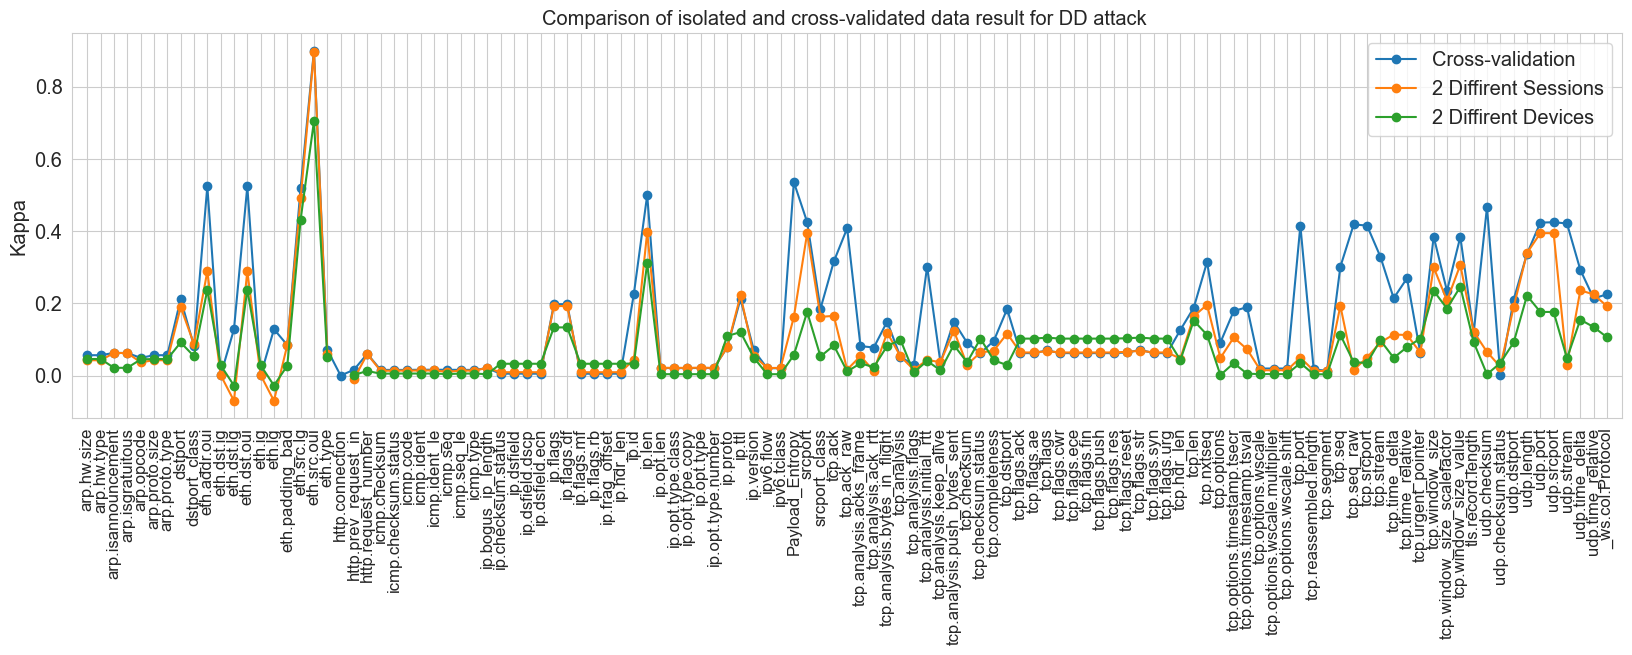

In [166]:
method={"CV":"Cross-validation","SS":"2 Diffirent Sessions","DD":"2 Diffirent Devices" }
import matplotlib.pylab as pylab
sns.set_style("whitegrid")
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'x-large'}
method={"CV":"Cross-validation","SS":"2 Diffirent Sessions","DD":"2 Diffirent Devices" }
for i in method: 
        graph_name=f"./pdfs/Comparison_kappa_{i}.pdf"
        plt.margins(x=0.01)
        my_xticks=cleandf["Feature"]#list(iso.index)
        pylab.rcParams.update(params)
        #plt.figure(figsize=(10,10))
        #plt.plot(my_xticks,iso['Acc'], linestyle='--', marker='.', color='b',label= "Separate Train & Test acc")
        #plt.plot(my_xticks,cv['Acc'], linestyle='--', marker='.', color='r',label= "10-Fold CV acc")
        plt.plot(my_xticks,cleandf[i], linestyle='-', marker='o',label= method[i])


    


plt.title(f"Comparison of isolated and cross-validated data result for {i} attack ")
plt.legend(numpoints=1)
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.ylabel("Kappa")
plt.xticks(rotation=90) 
#plt.ylim([0.69, 0.71]) 
plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
plt.show()
    
    

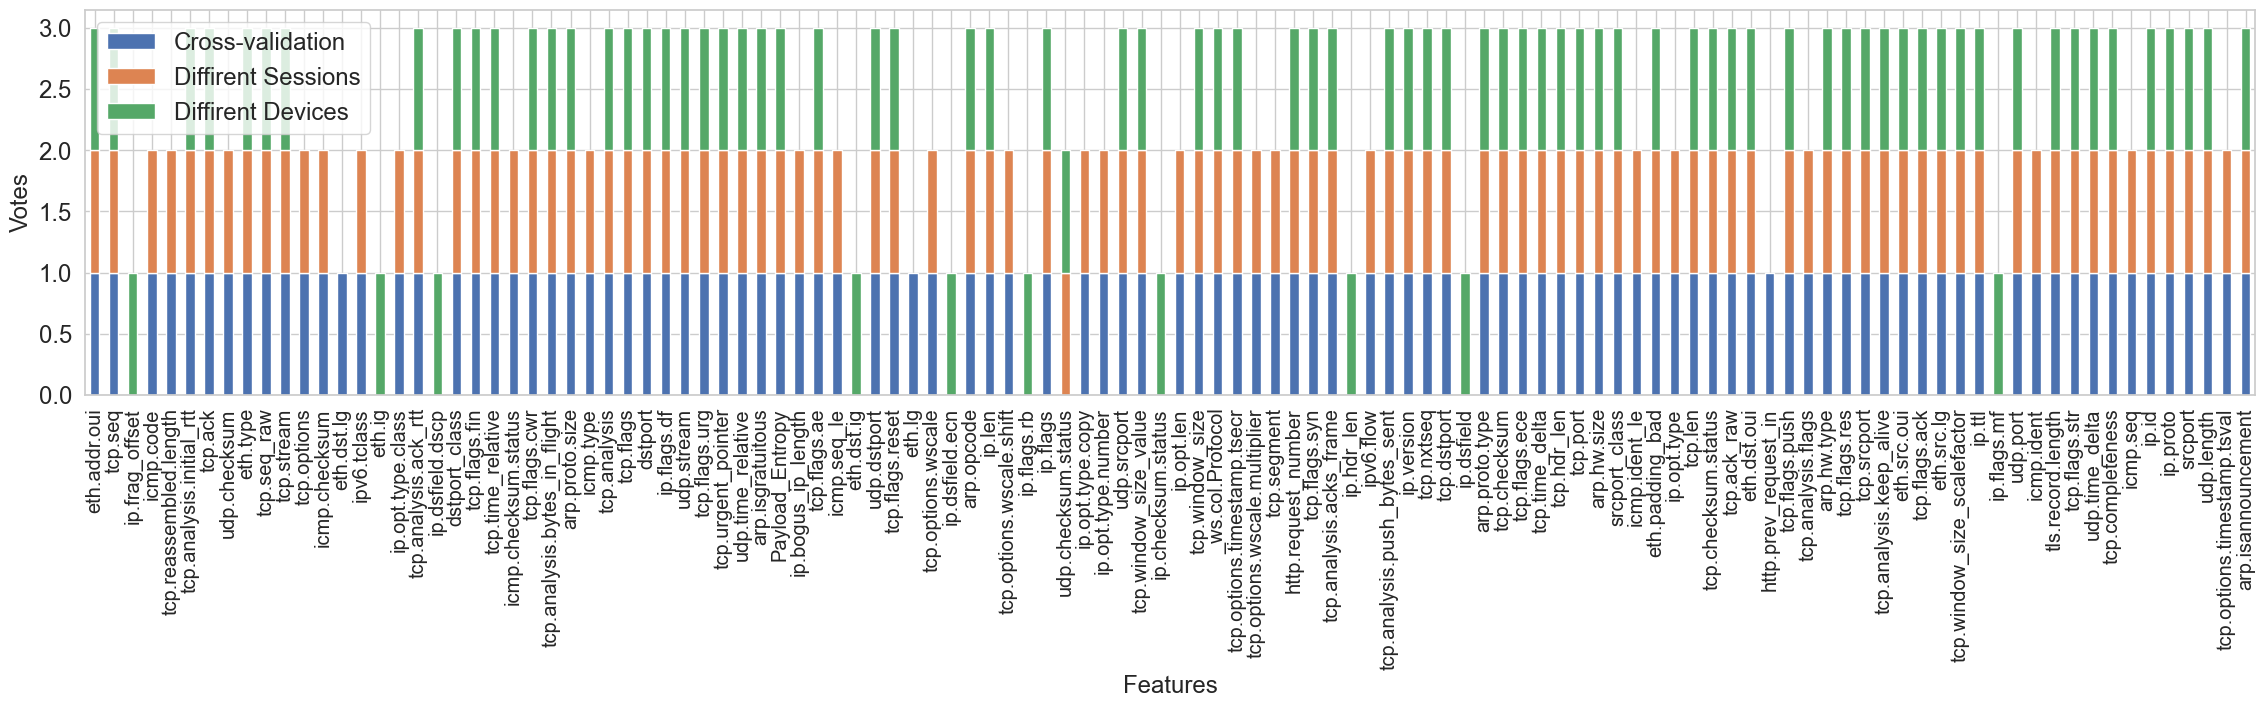

In [185]:
method={"CV":"Cross-validation","SS":"2 Diffirent Sessions","DD":"2 Diffirent Devices" }

cv=[]
ss=[]
dd=[]
limit=0.01
for i in totaldf.values:
    if i[1]>limit:
        cv.append(i[0])
    if i[2]>limit:
        ss.append(i[0])
    if i[3]>limit:
        dd.append(i[0])
main=cv+ss+dd
main=list(set(main))

mainlist=[]
for i in main:
    temp=[i,int(i in cv),int(i in ss),int(i in dd)]
    mainlist.append(temp)
data=pd.DataFrame(mainlist, columns=["Feature", "Cross-validation","Diffirent Sessions","Diffirent Devices"]).set_index('Feature')

graph_name=f"./pdfs/kappa_Voting2.PDF"
import seaborn as sns
sns.set_theme(style="whitegrid")

plt.rcParams.update(params)
import matplotlib.pylab as pylab

#pylab.rcParams.update(params)

data.plot.bar(stacked=True,figsize=(28,5))
plt.xlabel('Features')
plt.ylabel('Votes')
plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
plt.show()


GA_input_features=[]
for i in main:
    if i in dd:
        GA_input_features.append(i)
    elif (i in ss) and (i in cv):
        GA_input_features.append(i)
        
        
        


In [186]:
len(GA_input_features)

111

In [187]:
len(main)

114

In [188]:
GA_input_features

['eth.addr.oui',
 'tcp.seq',
 'ip.frag_offset',
 'icmp.code',
 'tcp.reassembled.length',
 'tcp.analysis.initial_rtt',
 'tcp.ack',
 'udp.checksum',
 'eth.type',
 'tcp.seq_raw',
 'tcp.stream',
 'tcp.options',
 'icmp.checksum',
 'ipv6.tclass',
 'eth.ig',
 'ip.opt.type.class',
 'tcp.analysis.ack_rtt',
 'ip.dsfield.dscp',
 'dstport_class',
 'tcp.flags.fin',
 'tcp.time_relative',
 'icmp.checksum.status',
 'tcp.flags.cwr',
 'tcp.analysis.bytes_in_flight',
 'arp.proto.size',
 'icmp.type',
 'tcp.analysis',
 'tcp.flags',
 'dstport',
 'ip.flags.df',
 'udp.stream',
 'tcp.flags.urg',
 'tcp.urgent_pointer',
 'udp.time_relative',
 'arp.isgratuitous',
 'Payload_Entropy',
 'ip.bogus_ip_length',
 'tcp.flags.ae',
 'icmp.seq_le',
 'eth.dst.ig',
 'udp.dstport',
 'tcp.flags.reset',
 'tcp.options.wscale',
 'ip.dsfield.ecn',
 'arp.opcode',
 'ip.len',
 'tcp.options.wscale.shift',
 'ip.flags.rb',
 'ip.flags',
 'udp.checksum.status',
 'ip.opt.type.copy',
 'ip.opt.type.number',
 'udp.srcport',
 'tcp.window_size_v